In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import sklearn
import glob
import os
from os import path

In [5]:
path = 'english-premier-league_zip/archive'
csv_files = glob.glob(os.path.join(path, "*.csv"))

In [6]:
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f)
      
    # print the location, filename, length
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
    print(f'length of df = {len(df)}')
      
    # print the content
    print('Content:')
    display(df.head(2))

    print()

Location: english-premier-league_zip/archive/season-1314.csv
File Name: english-premier-league_zip/archive/season-1314.csv
length of df = 380
Content:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,17/08/13,Arsenal,Aston Villa,1,3,A,1,1,D,...,2.37,NaN,NaN,NaN,NaN,NaN,NaN,1.44,5.00,8.05
1,E0,17/08/13,Liverpool,Stoke,1,0,H,1,0,H,...,2.02,NaN,NaN,NaN,NaN,NaN,NaN,1.42,4.62,10.19



Location: english-premier-league_zip/archive/season-1112.csv
File Name: english-premier-league_zip/archive/season-1112.csv
length of df = 380
Content:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,E0,13/08/11,Blackburn,Wolves,1,2,A,1,1,D,...,2.06,1.96,1.89,1.82,18,-0.50,2.20,2.14,1.78,1.74
1,E0,13/08/11,Fulham,Aston Villa,0,0,D,0,0,D,...,2.21,2.11,1.77,1.69,21,-0.25,1.83,1.80,2.14,2.08



Location: english-premier-league_zip/archive/season-1516.csv
File Name: english-premier-league_zip/archive/season-1516.csv
length of df = 380
Content:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,08/08/15,Bournemouth,Aston Villa,0,1,A,0,0,D,...,1.79,26,-0.5,1.98,1.93,1.99,1.92,1.82,3.88,4.70
1,E0,08/08/15,Chelsea,Swansea,2,2,D,2,1,H,...,1.99,27,-1.5,2.24,2.16,1.80,1.73,1.37,5.04,10.88



Location: english-premier-league_zip/archive/season-1617.csv
File Name: english-premier-league_zip/archive/season-1617.csv
length of df = 380
Content:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,1.61,32,-0.25,2.13,2.06,1.86,1.81,2.79,3.16,2.89
1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,1.52,33,-0.50,2.07,2.00,1.90,1.85,2.25,3.15,3.86



Location: english-premier-league_zip/archive/season-1415.csv
File Name: english-premier-league_zip/archive/season-1415.csv
length of df = 381
Content:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,16/08/14,Arsenal,Crystal Palace,2.0,1.0,H,1.0,1.0,D,...,2.1,24.0,-1.50,1.81,1.78,2.2,2.10,1.29,5.9,12.75
1,E0,16/08/14,Leicester,Everton,2.0,2.0,D,1.0,2.0,A,...,1.8,22.0,0.25,1.88,1.85,2.1,2.02,3.11,3.4,2.47



Location: english-premier-league_zip/archive/season-0910.csv
File Name: english-premier-league_zip/archive/season-0910.csv
length of df = 380
Content:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,E0,2009-08-15,Aston Villa,Wigan,0,2,A,0,1,A,...,2.04,1.92,1.91,1.81,21,0.0,1.28,1.22,4.4,3.99
1,E0,2009-08-15,Blackburn,Man City,0,2,A,0,1,A,...,2.15,2.04,1.78,1.71,24,0.0,2.58,2.38,1.6,1.54



Location: english-premier-league_zip/archive/season-1213.csv
File Name: english-premier-league_zip/archive/season-1213.csv
length of df = 380
Content:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,18/08/12,Arsenal,Sunderland,0,0,D,0,0,D,...,2.05,23,-1.25,2.02,1.96,1.96,1.91,1.44,4.72,8.71
1,E0,18/08/12,Fulham,Norwich,5,0,H,2,0,H,...,1.92,21,-0.50,1.83,1.80,2.14,2.09,1.84,3.75,4.75



Location: english-premier-league_zip/archive/season-1011.csv
File Name: english-premier-league_zip/archive/season-1011.csv
length of df = 380
Content:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,E0,14/08/10,Aston Villa,West Ham,3,0,H,2,0,H,...,2.11,2.01,1.82,1.75,20,0.0,1.45,1.40,3.00,2.78
1,E0,14/08/10,Blackburn,Everton,1,0,H,1,0,H,...,2.20,2.08,1.79,1.70,29,0.0,2.20,2.05,1.85,1.75



Location: english-premier-league_zip/archive/season-1819.csv
File Name: english-premier-league_zip/archive/season-1819.csv
length of df = 380
Content:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70



Location: english-premier-league_zip/archive/season-1718.csv
File Name: english-premier-league_zip/archive/season-1718.csv
length of df = 380
Content:


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,...,2.32,21,-1.0,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,...,2.27,20,1.5,1.95,1.91,2.01,1.96,11.75,6.15,1.29


In [7]:
len(csv_files)

10

In [9]:
#concatenate files to one file
li = []

for filename in csv_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

epl= pd.concat(li, axis=0, ignore_index=True)
epl



,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,PSCA,GBH,GBD,GBA,SBH,SBD,SBA,BSH,BSD,BSA
0,E0,17/08/13,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,...,8.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,17/08/13,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,...,10.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,17/08/13,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,...,2.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,17/08/13,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,...,3.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,17/08/13,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,...,2.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,E0,13/05/18,Newcastle,Chelsea,3.0,0.0,H,1.0,0.0,H,...,1.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3797,E0,13/05/18,Southampton,Man City,0.0,1.0,A,0.0,0.0,D,...,1.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3798,E0,13/05/18,Swansea,Stoke,1.0,2.0,A,1.0,2.0,A,...,3.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3799,E0,13/05/18,Tottenham,Leicester,5.0,4.0,H,1.0,2.0,A,...,8.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
epl.columns[:50]

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'Bb1X2',
       'BbMxH', 'BbAvH'],
      dtype='object')

In [24]:
epl.columns[50:]

Index(['BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5',
       'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH',
       'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA', 'GBH', 'GBD', 'GBA',
       'SBH', 'SBD', 'SBA', 'BSH', 'BSD', 'BSA'],
      dtype='object')

In [10]:
#match facts desired columns
#goals, shots, shots on target, possesion, tackles, fouls, yellow cards, red cards, corners
if len(epl.columns) > 50: 
    epl= epl.iloc[:, 1:23]
epl.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,17/08/13,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,A Taylor,...,4.0,4.0,15.0,18.0,4.0,3.0,4.0,5.0,1.0,0.0
1,17/08/13,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,M Atkinson,...,11.0,4.0,11.0,11.0,12.0,6.0,1.0,1.0,0.0,0.0
2,17/08/13,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,M Oliver,...,2.0,6.0,13.0,10.0,6.0,8.0,2.0,0.0,0.0,0.0
3,17/08/13,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,N Swarbrick,...,3.0,1.0,14.0,14.0,6.0,1.0,0.0,3.0,0.0,0.0
4,17/08/13,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,P Dowd,...,6.0,7.0,13.0,10.0,7.0,4.0,1.0,3.0,0.0,0.0


In [11]:
#drop referee, HomeTeam, AwayTeam columns
if 'HomeTeam' in epl.columns:
    epl.drop(['HomeTeam'], axis = 1, inplace = True)
if 'AwayTeam' in epl.columns:
    epl.drop(['AwayTeam'], axis = 1, inplace = True)
if 'Referee' in epl.columns:
    epl.drop(['Referee'], axis = 1, inplace = True)
epl.head()

,Date,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,17/08/13,1.0,3.0,A,1.0,1.0,D,16.0,9.0,4.0,4.0,15.0,18.0,4.0,3.0,4.0,5.0,1.0,0.0
1,17/08/13,1.0,0.0,H,1.0,0.0,H,26.0,10.0,11.0,4.0,11.0,11.0,12.0,6.0,1.0,1.0,0.0,0.0
2,17/08/13,2.0,2.0,D,0.0,0.0,D,8.0,19.0,2.0,6.0,13.0,10.0,6.0,8.0,2.0,0.0,0.0,0.0
3,17/08/13,0.0,1.0,A,0.0,0.0,D,20.0,5.0,3.0,1.0,14.0,14.0,6.0,1.0,0.0,3.0,0.0,0.0
4,17/08/13,1.0,4.0,A,0.0,2.0,A,17.0,15.0,6.0,7.0,13.0,10.0,7.0,4.0,1.0,3.0,0.0,0.0


<AxesSubplot:xlabel='HST', ylabel='FTHG'>

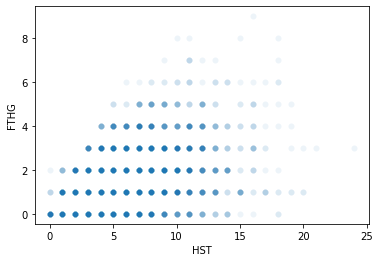

In [33]:
sns.scatterplot(y = 'FTHG', x = 'HST', data = epl, alpha = .08)

<AxesSubplot:xlabel='AST', ylabel='FTHG'>

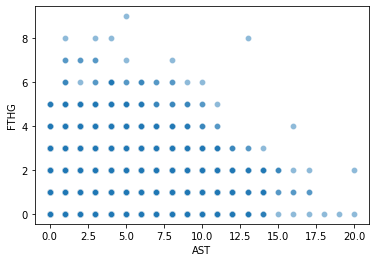

In [23]:
sns.scatterplot(y = 'FTHG', x = 'AST', data = epl, alpha = .5)

<AxesSubplot:xlabel='FTHG', ylabel='FTR'>

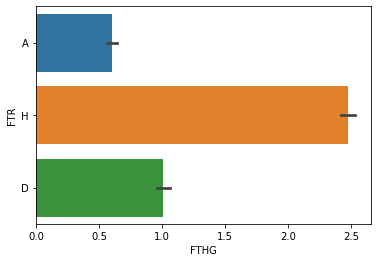

In [26]:
sns.barplot(y = 'FTR', x = 'FTHG', data = epl)

<AxesSubplot:xlabel='HR', ylabel='FTR'>

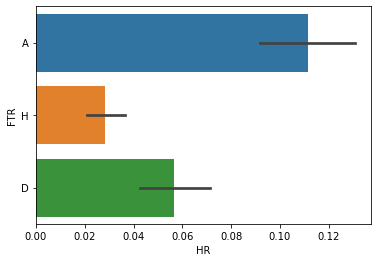

In [27]:
sns.barplot(y = 'FTR', x = 'HR', data = epl)

<AxesSubplot:xlabel='HS', ylabel='FTR'>

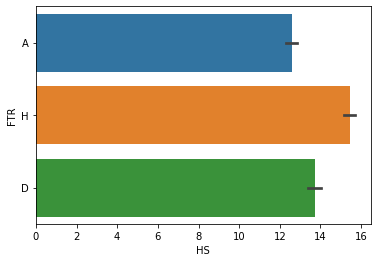

In [28]:
sns.barplot(y = 'FTR', x = 'HS', data = epl)

<AxesSubplot:xlabel='HST', ylabel='FTR'>

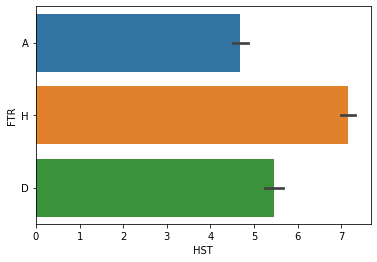

In [29]:
sns.barplot(y = 'FTR', x = 'HST', data = epl)

In [34]:
epl.head()

,Date,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,17/08/13,1.0,3.0,A,1.0,1.0,D,16.0,9.0,4.0,4.0,15.0,18.0,4.0,3.0,4.0,5.0,1.0,0.0
1,17/08/13,1.0,0.0,H,1.0,0.0,H,26.0,10.0,11.0,4.0,11.0,11.0,12.0,6.0,1.0,1.0,0.0,0.0
2,17/08/13,2.0,2.0,D,0.0,0.0,D,8.0,19.0,2.0,6.0,13.0,10.0,6.0,8.0,2.0,0.0,0.0,0.0
3,17/08/13,0.0,1.0,A,0.0,0.0,D,20.0,5.0,3.0,1.0,14.0,14.0,6.0,1.0,0.0,3.0,0.0,0.0
4,17/08/13,1.0,4.0,A,0.0,2.0,A,17.0,15.0,6.0,7.0,13.0,10.0,7.0,4.0,1.0,3.0,0.0,0.0


In [ ]:
#I want to predict
#1) FTHG - full time home goals
#2) FTAG - full time away goals
#3) FTR - full time result (A, H, D)